**FEATURE SELECTION**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ls

2019-Lab-No-Malaria-Cleaned.ipynb
2019-lab-no-malaria-or-plot.pdf
2019Final_ALL+Lab_VF.ipynb 
2019Final_without_Malaria+ALLLab_VF.ipynb
2019Final_without_Malaria+Lab_VF.ipynb
2019_no_malaria_english.csv
BestModel_2018train_2019test.ipynb
Feature Selection_2019.ipynb
clean2018-2019_all_NO_Malaria.csv
clean2018_all_NO_Malaria.csv
clean2019ALL_Labdata_NO_MALARIA.csv
clean2019_NO_MALARIA.csv


In [6]:
df = pd.read_csv("clean2018-2019_all_NO_Malaria.csv")

In [7]:
df

,age,temperature,blood glucose,hemoglobin,heart rate category_encoded,sex_F,prior antibiotics_1.0,prior antimalarials_1.0,prior malaria diagnostic_1.0,headache_1.0,...,rash_1.0,sore throat_1.0,swelling_1.0,bleeding_1.0,contact with febrile person_1.0,contact with rats_1.0,recent travel_1.0,season_pluie,abdominal pain_1.0,Borrelia
0,1.643772,0.335314,-1.624846e-01,-1.720707e-01,0,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
1,-0.804020,0.041860,-1.087695e+00,-4.077301e-01,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.668032,0.824405,1.073684e-01,1.645858e-01,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.804020,-2.012320,-8.538372e-02,1.241886e+00,2,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,-0.736026,0.530951,-4.683329e-02,-3.403989e-01,2,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.283887,-0.055958,2.343294e+00,-9.800460e-01,0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
447,-0.668032,-0.055958,-3.166863e-01,-1.013712e+00,1,0,0,0,1,1,...,0,1,0,1,1,1,0,1,0,0
448,2.187726,-0.153776,-1.858704e+00,-6.770553e-01,2,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,0
449,-0.736026,3.367676,-8.559916e-16,1.196044e-15,2,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [8]:
#FEATURE SELECTION 

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [10]:
import time

#Create an automated routine to test different K values for f_classif method
#f-classif only considers numercial predictors - will not be used in this analysis 

K_vs_score_fc = [] #List to store AUC of each K with f_classif

start = time.time()

for k in range(2, 25, 2):
    start = time.time()
    
    # Instantiating a KBest object for each of the metrics in order to obtain the K features with the highest value
    selector_fc = SelectKBest(score_func = f_classif, k = k)

    
    # Selecting K-features and modifying the dataset
    X_selected_fc = selector_fc.fit_transform(X, y)

    
    # Instantiating an XGBClassifier object
    clf = xgb.XGBClassifier(seed=42)
    
    # Using 10-CV to calculate AUC for each K value avoinding overfitting
    auc_fc = cross_val_score(clf, X_selected_fc, y, cv = 10, scoring = 'roc_auc', error_score='raise')

    
    # Adding the average values obtained in the CV for further analysis.
    K_vs_score_fc.append(auc_fc.mean())

    
    end = time.time()
    # Returning the metrics related to the tested K and the time spent on this iteration of the loop
    print("k = {} - auc_fc = {} - Time = {}s".format(k, auc_fc.mean(), end-start))
    
end = time.time()
print(end - start)

k = 2 - auc_fc = 0.6610167440960124 - Time = 1.197782039642334s
k = 4 - auc_fc = 0.7752129307007356 - Time = 1.0436279773712158s
k = 6 - auc_fc = 0.7326582462253193 - Time = 1.196558952331543s
k = 8 - auc_fc = 0.7507404181184669 - Time = 1.087411880493164s
k = 10 - auc_fc = 0.7100609756097561 - Time = 1.1384978294372559s
k = 12 - auc_fc = 0.6924506387921021 - Time = 1.0741450786590576s
k = 14 - auc_fc = 0.6924506387921021 - Time = 1.088155746459961s
k = 16 - auc_fc = 0.6798780487804879 - Time = 1.0766749382019043s
k = 18 - auc_fc = 0.7036585365853659 - Time = 1.0724830627441406s
k = 20 - auc_fc = 0.6815089043747581 - Time = 1.1091227531433105s
k = 22 - auc_fc = 0.6644115369725127 - Time = 1.0936188697814941s
k = 24 - auc_fc = 0.649182152535811 - Time = 1.0866479873657227s
1.0868029594421387


In [11]:
from sklearn.metrics import SCORERS
print(list(SCORERS.keys()))

ImportError: cannot import name 'SCORERS' from 'sklearn.metrics' (/Users/andres/anaconda3/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [12]:
# Just for purpose of sharing this piece of code
# Create an automated routine to test different K values for mutual_info_classif
#mutual_info_classif considers both categorical and numerical features - will be used in this analysis

K_vs_score_mic = [] #List to store AUC of each K with mutual_info_classif


for k in range(2, 25, 2):
    start = time.time()
    
    # Instantiating a KBest object for each of the metrics in order to obtain the K features with the highest value
    selector_mic = SelectKBest(score_func = mutual_info_classif, k = k)
    
    # Selecting K-features and modifying the dataset
    X_selected_mic = selector_mic.fit_transform(X, y) 
    
    # Instantiating an XGBClassifier object
    clf = xgb.XGBClassifier(seed=42)
    
    # Using 10-CV to calculate weighted AUC for each K value avoiding overfitting & handling class imbalance
    auc_mic = cross_val_score(clf, X_selected_mic, y, cv = 10, scoring = 'roc_auc_ovr_weighted')
    
    # Adding the average values obtained in the CV for further analysis.
    K_vs_score_mic.append(auc_mic.mean())
    
    end = time.time()
    # Returning the metrics related to the tested K and the time spent on this iteration of the loop
    print("k = {} - auc_mic = {} - Time = {}s".format(k, auc_mic.mean(), end-start))

k = 2 - auc_mic = 0.6081542779713511 - Time = 1.1921038627624512s
k = 4 - auc_mic = 0.6156963801780876 - Time = 1.1207530498504639s
k = 6 - auc_mic = 0.774908052651955 - Time = 1.1473121643066406s
k = 8 - auc_mic = 0.5952671312427411 - Time = 1.1711668968200684s
k = 10 - auc_mic = 0.6228658536585365 - Time = 1.1816699504852295s
k = 12 - auc_mic = 0.6125629113433992 - Time = 1.2591760158538818s
k = 14 - auc_mic = 0.693583042973287 - Time = 1.1287827491760254s
k = 16 - auc_mic = 0.6027729384436702 - Time = 1.1644749641418457s
k = 18 - auc_mic = 0.6605449090205188 - Time = 1.1414480209350586s
k = 20 - auc_mic = 0.6476384049554781 - Time = 1.1535308361053467s
k = 22 - auc_mic = 0.6408004258614015 - Time = 1.144808053970337s
k = 24 - auc_mic = 0.6437427409988385 - Time = 1.1386630535125732s


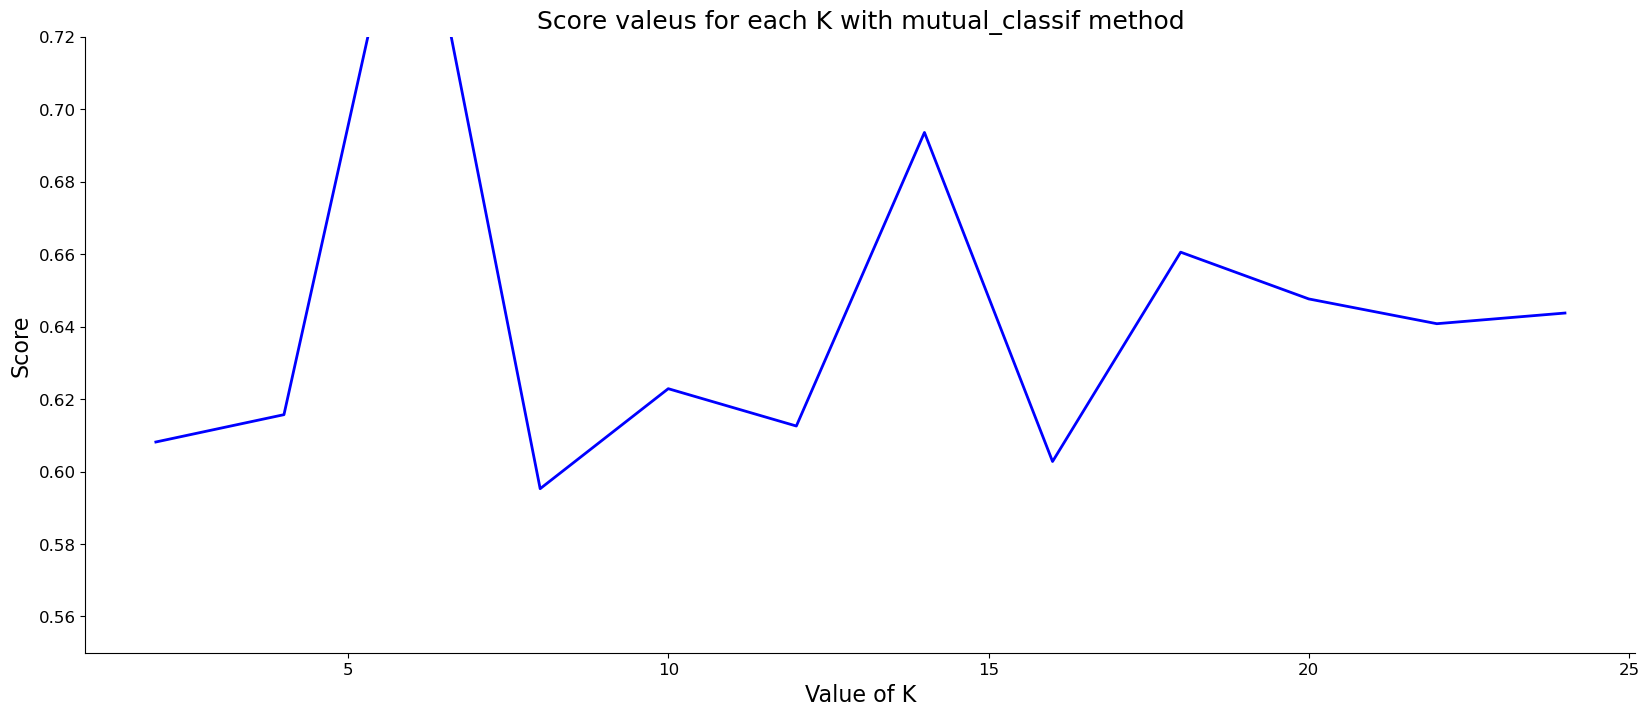

In [13]:
# Ploting K_vs_score_fc (# of K-Best features vs AUC) 
import matplotlib.patches as patches

# Figure setup
fig, ax = plt.subplots(1, figsize = (20, 8))
plt.title('Score valeus for each K with mutual_classif method', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Create the lines
plt.plot(np.arange(2, 26, 2), K_vs_score_mic, color='blue', linewidth=2)
ax.set_ylim(0.55, 0.72);

# Create a Rectangle patch
#rect = patches.Rectangle((1, 0.7175), 5, (0.73 - 0.7175), linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)

plt.show()


In [14]:
#Seems model with 12 features can give better results 

In [15]:
# Create an automated routine to test different K values for mutual_info_classif
#mutual_info_classif considers both categorical and numerical features

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

K_vs_score_mic = [] #List to store AUC of each K with mutual_info_classif

for k in range(2, 25, 2):
    start = time.time()
    
    # Instantiating a KBest object for each of the metrics in order to obtain the K features with the highest value
    selector_mic = SelectKBest(score_func = mutual_info_classif, k = k)
    
    # Selecting K-features and modifying the dataset
    X_selected_mic = selector_mic.fit_transform(X_resampled, y_resampled) 
    
    # Instantiating an XGBClassifier object
    clf = xgb.XGBClassifier(seed=42)
    
    # Using 10-CV to calculate AUC for each K value avoinding overfitting
    auc_mic = cross_val_score(clf, X_selected_mic, y_resampled, cv = 10, scoring = 'f1')
    
    # Adding the average values obtained in the CV for further analysis.
    K_vs_score_mic.append(auc_mic.mean())
    
    end = time.time()
    # Returning the metrics related to the tested K and the time spent on this iteration of the loop
    print("k = {} - auc_mic = {} - Time = {}s".format(k, auc_mic.mean(), end-start))

NameError: name 'SMOTE' is not defined

In [16]:
# Create an automated routine to test different K values for mutual_info_classif
#mutual_info_classif considers both categorical and numerical features

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

K_vs_score_mic = [] #List to store AUC of each K with mutual_info_classif

for k in range(2, 25, 2):
    start = time.time()
    
    # Instantiating a KBest object for each of the metrics in order to obtain the K features with the highest value
    selector_mic = SelectKBest(score_func = mutual_info_classif, k = k)
    
    # Selecting K-features and modifying the dataset
    X_selected_mic = selector_mic.fit_transform(X_resampled, y_resampled) 
    
    # Instantiating an XGBClassifier object
    clf = xgb.XGBClassifier(seed=42)
    
    # Using 10-CV to calculate AUC for each K value avoinding overfitting
    auc_mic = cross_val_score(clf, X_selected_mic, y_resampled, cv = 10, scoring = 'f1')
    
    # Adding the average values obtained in the CV for further analysis.
    K_vs_score_mic.append(auc_mic.mean())
    
    end = time.time()
    # Returning the metrics related to the tested K and the time spent on this iteration of the loop
    print("k = {} - auc_mic = {} - Time = {}s".format(k, auc_mic.mean(), end-start))

NameError: name 'SMOTE' is not defined

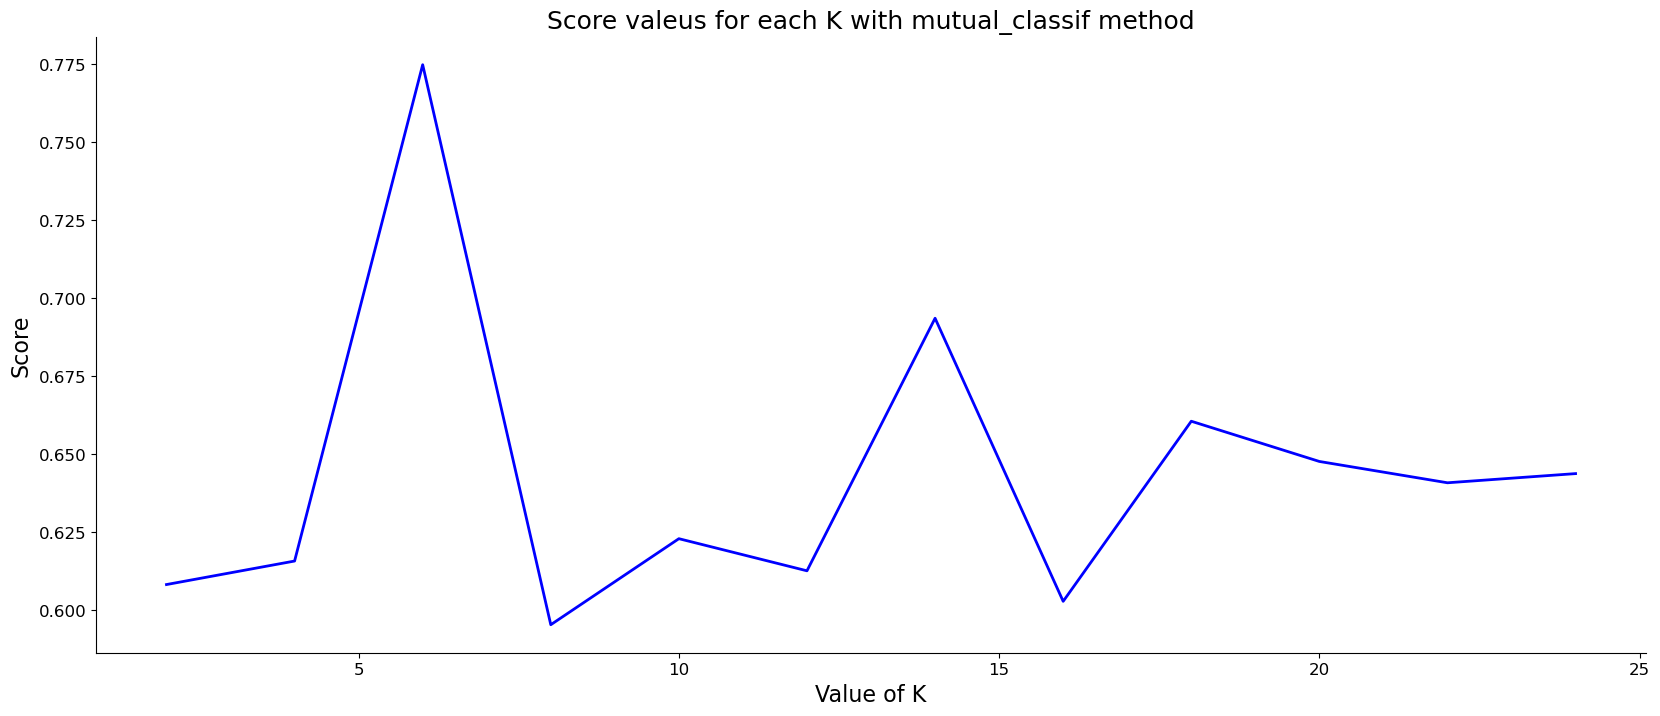

In [17]:
# Ploting K_vs_score_mic (# of K-Best features vs f1)

# Figure setup
fig, ax = plt.subplots(figsize = (20, 8))
plt.title('Score valeus for each K with mutual_classif method', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Create the lines
plt.plot(np.arange(2, 26, 2), K_vs_score_mic, color='blue', linewidth=2)

plt.show()

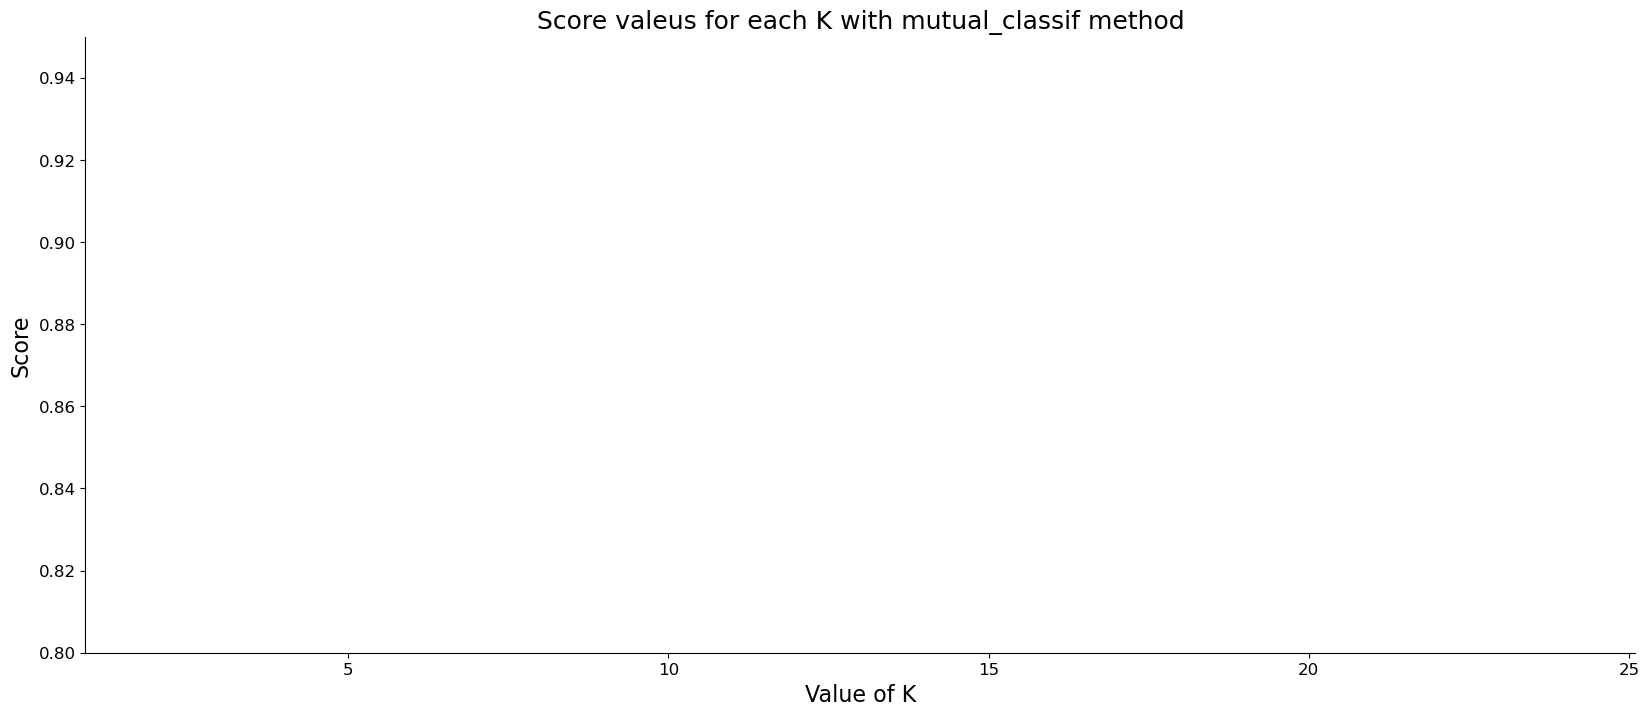

In [18]:
# Ploting K_vs_score_mic (# of K-Best features vs AUC) 
import matplotlib.patches as patches

# Figure setup
fig, ax = plt.subplots(1, figsize = (20, 8))
plt.title('Score valeus for each K with mutual_classif method', fontsize=18)
plt.ylabel('Score', fontsize = 16)
plt.xlabel('Value of K', fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Create the lines
plt.plot(np.arange(2, 26, 2), K_vs_score_mic, color='blue', linewidth=2)
ax.set_ylim(0.80, 0.95);

# Create a Rectangle patch
#rect = patches.Rectangle((1, 0.7175), 5, (0.73 - 0.7175), linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)

plt.show()



In [19]:
#Using both weigted roc_auc and f1 as metric scorers, it seems K=12 may give better result. 
#Therefore, Our final model will have 12 features included

In [20]:
mask_selected = selector_mic.get_support()
# Saving the selected columns in a list
selected_col = X.columns[mask_selected]
selected_col

Index(['age', 'temperature', 'blood glucose', 'heart rate category_encoded',
       'sex_F', 'prior antibiotics_1.0', 'prior antimalarials_1.0',
       'prior malaria diagnostic_1.0', 'headache_1.0', 'body aches_1.0',
       'dizziness_1.0', 'vomitting_1.0', 'fatigue/weakness_1.0',
       'chest pain_1.0', 'difficulty breathing_1.0', 'rash_1.0',
       'sore throat_1.0', 'swelling_1.0', 'bleeding_1.0',
       'contact with febrile person_1.0', 'contact with rats_1.0',
       'recent travel_1.0', 'season_pluie', 'abdominal pain_1.0'],
      dtype='object')

In [21]:
mask_selected = selector_mic.get_support()
# Saving the selected columns in a list
selected_col = X.columns[mask_selected]
selected_col

Index(['age', 'temperature', 'blood glucose', 'heart rate category_encoded',
       'sex_F', 'prior antibiotics_1.0', 'prior antimalarials_1.0',
       'prior malaria diagnostic_1.0', 'headache_1.0', 'body aches_1.0',
       'dizziness_1.0', 'vomitting_1.0', 'fatigue/weakness_1.0',
       'chest pain_1.0', 'difficulty breathing_1.0', 'rash_1.0',
       'sore throat_1.0', 'swelling_1.0', 'bleeding_1.0',
       'contact with febrile person_1.0', 'contact with rats_1.0',
       'recent travel_1.0', 'season_pluie', 'abdominal pain_1.0'],
      dtype='object')

In [22]:
mask_selected = selector_mic.get_support()
# Saving the selected columns in a list
selected_col = X_resampled.columns[mask_selected]
selected_col

NameError: name 'X_resampled' is not defined

In [23]:
#Same features selected by both methods

In [24]:
#Plot the features of importance
feature_score = pd.Series(selector_mic.scores_, index=X_resampled.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(feature_score.index[0:18], feature_score[0:18])
plt.gca().invert_yaxis()


ax.set_xlabel('K-Score', fontsize=18);
ax.set_ylabel('Features', fontsize=18);
ax.set_title('18 best features by its K-Score', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

NameError: name 'X_resampled' is not defined

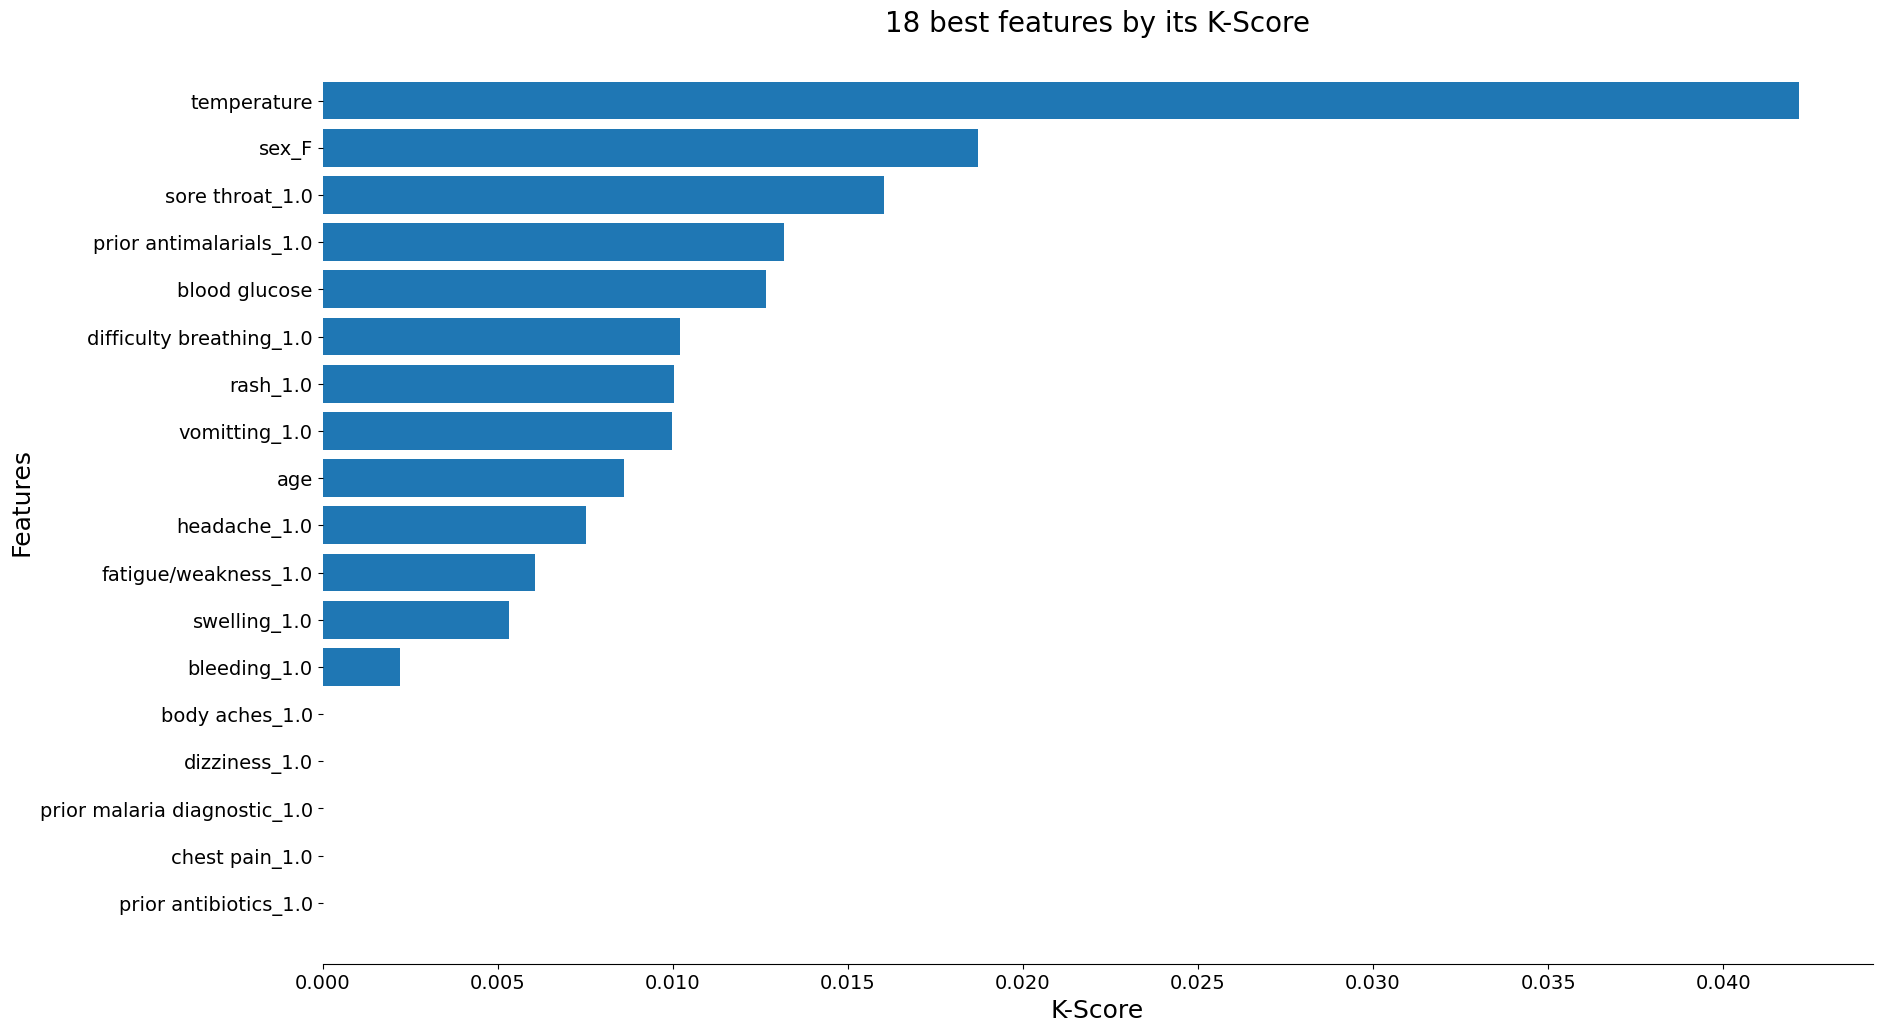

In [25]:
#Plot the features of importance
feature_score = pd.Series(selector_mic.scores_, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(feature_score.index[0:18], feature_score[0:18])
plt.gca().invert_yaxis()


ax.set_xlabel('K-Score', fontsize=18);
ax.set_ylabel('Features', fontsize=18);
ax.set_title('18 best features by its K-Score', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

In [26]:
[print(i) for i in feature_score.index[0:20]];

temperature
sex_F
sore throat_1.0
prior antimalarials_1.0
blood glucose
difficulty breathing_1.0
rash_1.0
vomitting_1.0
age
headache_1.0
fatigue/weakness_1.0
swelling_1.0
bleeding_1.0
body aches_1.0
dizziness_1.0
prior malaria diagnostic_1.0
chest pain_1.0
prior antibiotics_1.0
heart rate category_encoded
hemoglobin


In [27]:
#RFE with logistic regression

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 12 variables as output

rfe=RFE(logreg, n_features_to_select=12)
rfe.fit(X, y)
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False])

In [28]:
cols_to_keep=X.columns[rfe.support_]

In [29]:
cols_to_keep

Index(['temperature', 'sex_F', 'prior antibiotics_1.0', 'headache_1.0',
       'vomitting_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'contact with febrile person_1.0',
       'recent travel_1.0', 'season_pluie'],
      dtype='object')

In [30]:
import statsmodels.api as sm

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

NameError: name 'X_train_sm' is not defined

In [32]:
cols_to_keep=X.columns[rfecv.support_]

NameError: name 'rfecv' is not defined

In [33]:
cols_to_keep

Index(['temperature', 'sex_F', 'prior antibiotics_1.0', 'headache_1.0',
       'vomitting_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'contact with febrile person_1.0',
       'recent travel_1.0', 'season_pluie'],
      dtype='object')

In [34]:

# Loading dataset into a pandas DataFrame for modelling
# X should be your feature matrix and y your target variable
# Replace 'data.csv' with your actual data file
data = pd.read_csv('clean2018_all_NO_Malaria.csv')
data2 = pd.read_csv('clean2019_NO_MALARIA.csv')
 

In [35]:
data = data.drop('prior malaria diagnostic_1.0', axis=1)
data

,age,temperature,blood glucose,hemoglobin,heart rate category_encoded,sex_F,prior antibiotics_1.0,prior antimalarials_1.0,headache_1.0,body aches_1.0,...,rash_1.0,sore throat_1.0,swelling_1.0,bleeding_1.0,contact with febrile person_1.0,contact with rats_1.0,recent travel_1.0,season_pluie,abdominal pain_1.0,Borrelia
0,1.643772,0.335314,-1.624846e-01,-1.720707e-01,0,1,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
1,-0.804020,0.041860,-1.087695e+00,-4.077301e-01,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,-0.668032,0.824405,1.073684e-01,1.645858e-01,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.804020,-2.012320,-8.538372e-02,1.241886e+00,2,0,0,0,1,1,...,0,0,0,0,1,1,1,0,0,0
4,-0.736026,0.530951,-4.683329e-02,-3.403989e-01,2,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.283887,-0.055958,2.343294e+00,-9.800460e-01,0,1,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
447,-0.668032,-0.055958,-3.166863e-01,-1.013712e+00,1,0,0,0,1,0,...,0,1,0,1,1,1,0,1,0,0
448,2.187726,-0.153776,-1.858704e+00,-6.770553e-01,2,0,0,0,1,0,...,0,1,0,0,1,1,1,1,0,0
449,-0.736026,3.367676,-8.559916e-16,1.196044e-15,2,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [36]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:,-1] 

X_test = data2.iloc[:, :-1]
y_test = data2.iloc[:,-1] 

In [37]:
#SMOTE, Logistic regression, RFE

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Initialize the RFE object with the logistic regression model and desired number of features
num_features_to_select = 10  # Replace with your desired number of features
rfe = RFE(estimator=logreg_model, n_features_to_select=num_features_to_select)

# Fit RFE to the resampled training data
rfe.fit(X_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Filter the resampled training and testing data with selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Perform cross-validation using F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score)
cv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=f1_scorer)

# Print cross-validation scores
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


Cross-Validation F1 Scores: [0.62650602 0.84444444 0.81609195 0.80681818 0.8452381 ]
Mean CV F1 Score: 0.787819739924019


In [38]:
cols_to_keep=X.columns[rfecv.support_]

NameError: name 'rfecv' is not defined

In [39]:
cols_to_keep

Index(['temperature', 'sex_F', 'prior antibiotics_1.0', 'headache_1.0',
       'vomitting_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'contact with febrile person_1.0',
       'recent travel_1.0', 'season_pluie'],
      dtype='object')

In [40]:
#SMOTE, Logistic regression, RFE

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class in the train set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Initialize the RFE object with the logistic regression model and desired number of features
num_features_to_select = 15  # Replace with your desired number of features
rfe = RFE(estimator=logreg_model, n_features_to_select=num_features_to_select)

# Fit RFE to the resampled training data
rfe.fit(X_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Filter the resampled training and testing data with selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Perform cross-validation using F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score)
f1cv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=f1_scorer)

# Print cross-validation scores
#print("Cross-Validation F1 Scores:", f1cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


recall_scorer = make_scorer(recall_score)
recallcv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=recall_scorer)

precision_scorer = make_scorer(precision_score)
precisioncv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=precision_scorer)


# Print cross-validation scores
print("Mean CV recall Score:", np.mean(recallcv_scores))
print("Mean CV precision Score:", np.mean(precisioncv_scores))

Mean CV F1 Score: 0.787819739924019
Mean CV recall Score: 0.857067293564502
Mean CV precision Score: 0.8027162740832621


In [41]:
cols_to_keep=X_train.columns[rfe.support_]

In [42]:
cols_to_keep

Index(['temperature', 'heart rate category_encoded', 'sex_F',
       'prior antibiotics_1.0', 'prior antimalarials_1.0', 'headache_1.0',
       'fatigue/weakness_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'swelling_1.0', 'contact with rats_1.0',
       'season_pluie', 'abdominal pain_1.0'],
      dtype='object')

In [43]:
#SMOTE, Logistic regression, RFE

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class in the train set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Initialize the RFE object with the logistic regression model and desired number of features
num_features_to_select = 15  # Replace with your desired number of features
rfe = RFE(estimator=logreg_model, n_features_to_select=num_features_to_select)

# Fit RFE to the resampled training data
rfe.fit(X_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Filter the resampled training and testing data with selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Perform cross-validation using F1-score as the evaluation metric
f1_scorer = make_scorer(f1_score)
f1cv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=f1_scorer)

# Print cross-validation scores
#print("Cross-Validation F1 Scores:", f1cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))


recall_scorer = make_scorer(recall_score)
recallcv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=recall_scorer)

precision_scorer = make_scorer(precision_score)
precisioncv_scores = cross_val_score(logreg_model, X_train_selected, y_train_resampled, cv=5, scoring=precision_scorer)


# Print cross-validation scores
print("Mean CV recall Score:", np.mean(recallcv_scores))
print("Mean CV precision Score:", np.mean(precisioncv_scores))

Mean CV F1 Score: 0.787819739924019
Mean CV recall Score: 0.857067293564502
Mean CV precision Score: 0.8027162740832621


In [44]:
cols_to_keep=X_train.columns[rfe.support_]

In [45]:
cols_to_keep

Index(['temperature', 'heart rate category_encoded', 'sex_F',
       'prior antibiotics_1.0', 'prior antimalarials_1.0', 'headache_1.0',
       'fatigue/weakness_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'swelling_1.0', 'contact with rats_1.0',
       'season_pluie', 'abdominal pain_1.0'],
      dtype='object')

In [46]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem


# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
#n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Perform optimism bootstrap using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_selected, y_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
       # Fit the weighted logistic regression model to the training data
    weighted_logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = weighted_logreg.predict(X_test)

    # Calculate recall, precision, and F1 score for the test set
    recall_bootstraps.append(recall_score(y_test, y_pred_test))
    precision_bootstraps.append(precision_score(y_test, y_pred_test))
    f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

    # Calculate AUC-ROC curve for the test set
    y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
    auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

    # Calculate AUC-PR curve for the test set
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
    auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

    # Calculate odds ratio
    odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 25 but corresponding boolean dimension is 24

In [47]:
# Calculate the confidence intervals for each coefficient
alpha = 0.95  # 95% confidence interval
lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile
confidence_intervals = np.percentile(coefficient_samples, [lower_percentile * 100, upper_percentile * 100], axis=0)

# Print the confidence intervals
columns = X.columns
for i, column in enumerate(selected_features):
    print(f"Coefficient for {column}: {weighted_logreg.coef_[0][i]:.3f} (95% CI: {confidence_intervals[0][i]:.3f}, {confidence_intervals[1][i]:.3f})")
    

NameError: name 'coefficient_samples' is not defined

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_pred_prob_test' is not defined

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

NameError: name 'y_pred_prob_test' is not defined

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

NameError: name 'y_pred_prob_test' is not defined

In [51]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


NameError: name 'weighted_logreg' is not defined

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Lasso logistic regression model with cross-validation for alpha selection
# alphas = [0.1, 0.5, 1.0, 5.0]  # Add more values if needed
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X_train.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Store the coefficient estimates from each iteration
coefficient_samples = []

# Perform optimism bootstrap using KFold cross-validation

for i in range(n_bootstrap):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_selected, y_resampled):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
        # Fit the weighted logistic regression model to the training data
        weighted_logreg.fit(X_train, y_train)
    
        # Store the coefficient estimates
        coefficient_samples.append(weighted_logreg.coef_[0])

        # Predict on the test set
        y_pred_test = weighted_logreg.predict(X_test)

        # Calculate recall, precision, and F1 score for the test set
        recall_bootstraps.append(recall_score(y_test, y_pred_test))
        precision_bootstraps.append(precision_score(y_test, y_pred_test))
        f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

        # Calculate AUC-ROC curve for the test set
        y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
        auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

        # Calculate AUC-PR curve for the test set
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
        auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

        # Calculate odds ratio
        odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

# Calculate the confidence intervals for each coefficient
alpha = 0.95  # 95% confidence interval
lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile
confidence_intervals = np.percentile(coefficient_samples, [lower_percentile * 100, upper_percentile * 100], axis=0)

# Print the confidence intervals
columns = X.columns
for i, column in enumerate(selected_features):
    print(f"Coefficient for {column}: {weighted_logreg.coef_[0][i]:.3f} (95% CI: {confidence_intervals[0][i]:.3f}, {confidence_intervals[1][i]:.3f})")
    


Recall: 0.857 [0.797 - 0.914]
Precision: 0.811 [0.768 - 0.899]
F1 Score: 0.832 [0.783 - 0.870]
AUC-ROC: 0.898 [0.865 - 0.938]
AUC-PR: 0.880 [0.836 - 0.951]
Odds Ratio: 0.889 [0.824 - 0.954]
Coefficient for age: -0.193 (95% CI: -0.193, -0.047)
Coefficient for temperature: 0.583 (95% CI: 0.523, 0.677)
Coefficient for blood glucose: 0.098 (95% CI: -0.002, 0.109)
Coefficient for hemoglobin: -0.069 (95% CI: -0.084, -0.054)
Coefficient for heart rate category_encoded: -0.611 (95% CI: -0.678, -0.569)
Coefficient for sex_F: -1.307 (95% CI: -1.456, -1.269)
Coefficient for prior antibiotics_1.0: -1.637 (95% CI: -1.818, -1.534)
Coefficient for headache_1.0: 1.983 (95% CI: 1.883, 2.328)
Coefficient for body aches_1.0: 0.451 (95% CI: 0.226, 0.534)
Coefficient for dizziness_1.0: 0.034 (95% CI: -0.371, 0.034)
Coefficient for vomitting_1.0: 0.049 (95% CI: -0.056, 0.180)
Coefficient for fatigue/weakness_1.0: -0.677 (95% CI: -0.819, -0.636)
Coefficient for chest pain_1.0: -1.165 (95% CI: -1.406, -0.875)

# Performance on best model

In [54]:
#Best model has 12 features 
dataf = data[['temperature', 'sex_F', 'prior antibiotics_1.0', 'headache_1.0',
       'vomitting_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'contact with febrile person_1.0',
       'recent travel_1.0', 'season_pluie', 'Borrelia']]

dataf2 = data2[['temperature', 'sex_F', 'prior antibiotics_1.0', 'headache_1.0',
       'vomitting_1.0', 'chest pain_1.0', 'difficulty breathing_1.0',
       'rash_1.0', 'sore throat_1.0', 'contact with febrile person_1.0',
       'recent travel_1.0', 'season_pluie', 'Borrelia']]

In [55]:
X_train = dataf.iloc[:, :-1]
y_train = dataf.iloc[:,-1] 

X_test = dataf2.iloc[:, :-1]
y_test = dataf2.iloc[:,-1] 

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Lasso logistic regression model with cross-validation for alpha selection
# alphas = [0.1, 0.5, 1.0, 5.0]  # Add more values if needed
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X_train.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Store the coefficient estimates from each iteration
coefficient_samples = []

# Perform optimism bootstrap using KFold cross-validation

for i in range(n_bootstrap):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_selected, y_resampled):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
        # Fit the weighted logistic regression model to the training data
        weighted_logreg.fit(X_train, y_train)
    
        # Store the coefficient estimates
        coefficient_samples.append(weighted_logreg.coef_[0])

        # Predict on the test set
        y_pred_test = weighted_logreg.predict(X_test)

        # Calculate recall, precision, and F1 score for the test set
        recall_bootstraps.append(recall_score(y_test, y_pred_test))
        precision_bootstraps.append(precision_score(y_test, y_pred_test))
        f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

        # Calculate AUC-ROC curve for the test set
        y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
        auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

        # Calculate AUC-PR curve for the test set
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
        auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

        # Calculate odds ratio
        odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

# Calculate the confidence intervals for each coefficient
alpha = 0.95  # 95% confidence interval
lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile
confidence_intervals = np.percentile(coefficient_samples, [lower_percentile * 100, upper_percentile * 100], axis=0)

# Print the confidence intervals
columns = X.columns
for i, column in enumerate(selected_features):
    print(f"Coefficient for {column}: {weighted_logreg.coef_[0][i]:.3f} (95% CI: {confidence_intervals[0][i]:.3f}, {confidence_intervals[1][i]:.3f})")
    


Recall: 0.832 [0.797 - 0.889]
Precision: 0.776 [0.730 - 0.878]
F1 Score: 0.802 [0.774 - 0.854]
AUC-ROC: 0.864 [0.821 - 0.920]
AUC-PR: 0.843 [0.757 - 0.931]
Odds Ratio: 1.884 [1.756 - 2.000]
Coefficient for temperature: 0.610 (95% CI: 0.563, 0.693)
Coefficient for sex_F: -0.975 (95% CI: -1.196, -0.846)
Coefficient for prior antibiotics_1.0: -1.624 (95% CI: -1.989, -1.624)
Coefficient for headache_1.0: 1.929 (95% CI: 1.929, 2.265)
Coefficient for vomitting_1.0: 0.381 (95% CI: 0.367, 0.499)
Coefficient for chest pain_1.0: -1.149 (95% CI: -1.349, -0.874)
Coefficient for difficulty breathing_1.0: -1.879 (95% CI: -2.122, -1.729)
Coefficient for sore throat_1.0: -2.249 (95% CI: -2.454, -2.183)
Coefficient for recent travel_1.0: 0.187 (95% CI: 0.042, 0.257)
Coefficient for season_pluie: -0.947 (95% CI: -1.126, -0.942)


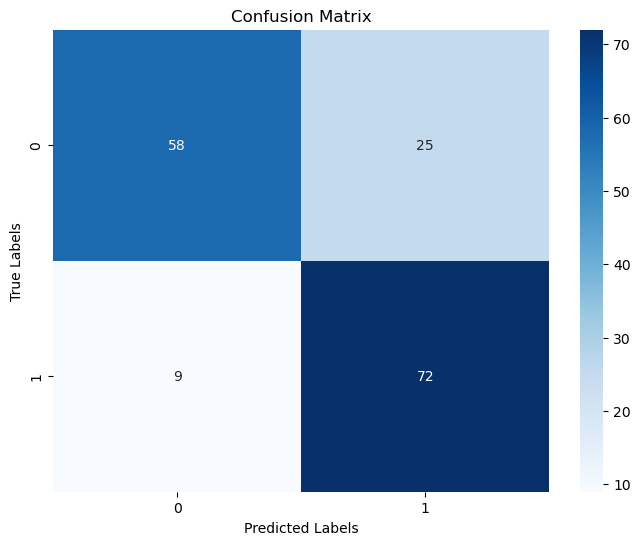

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


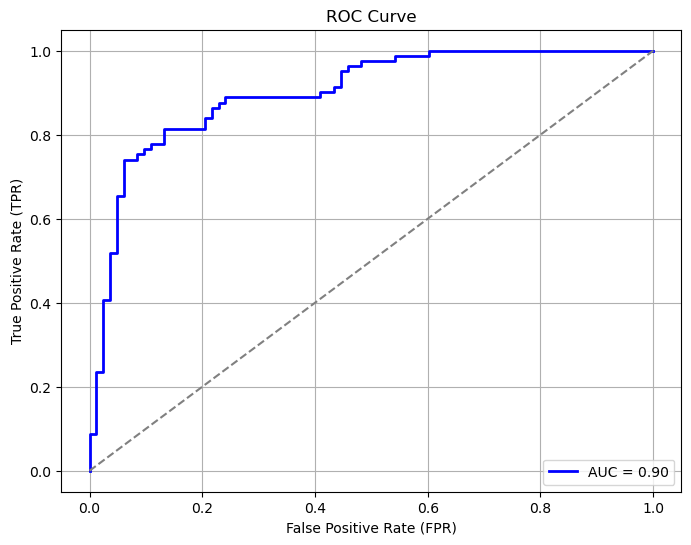

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

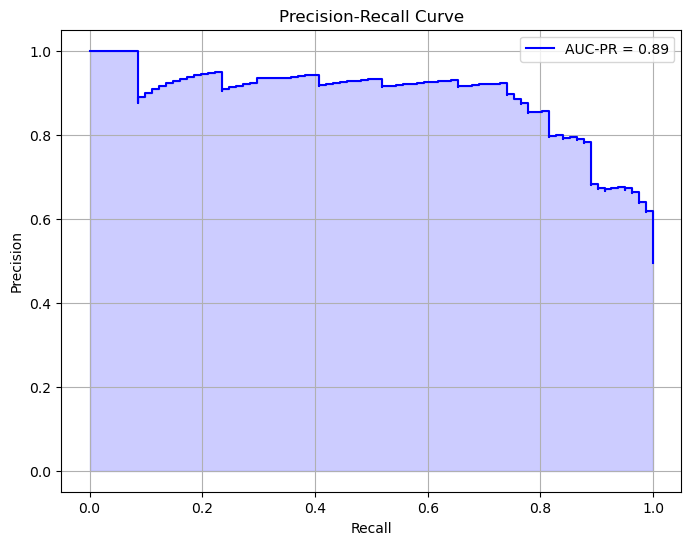

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

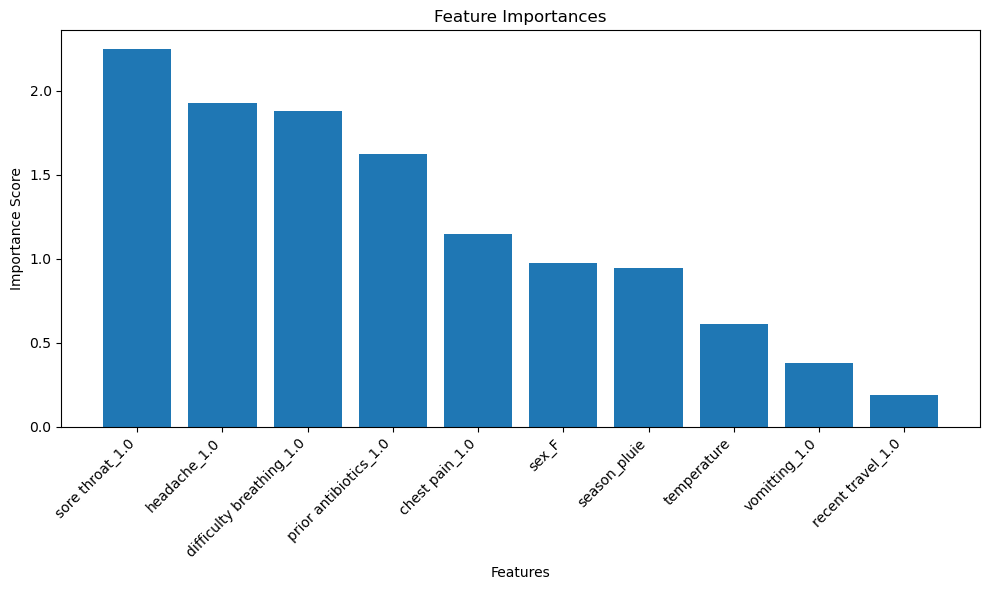

In [63]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [64]:
feature_labels = []
for feat in selected_features:
    if feat == "sex_F":
        feature_labels.append("female")
    elif feat == "heart rate category_encoded":
        feature_labels.append("heart rate")
    elif feat == "season_pluie":
        feature_labels.append("rainy season")
    elif feat == "abdominal pain_1":
        feature_labels.append("abdominal pain")        
    else:
        feature_labels.append(feat.replace("_1.0", ""))

feature_labels

['temperature',
 'female',
 'prior antibiotics',
 'headache',
 'vomitting',
 'chest pain',
 'difficulty breathing',
 'sore throat',
 'recent travel',
 'rainy season']

In [65]:
odds = pd.DataFrame({"2.5%": list(np.exp(confidence_intervals[0])),
                     "97.5%": list(np.exp(confidence_intervals[1])),
                     "Odds Ratio": list(np.exp(weighted_logreg.coef_[0]))}, index=feature_labels)
odds

,2.5%,97.5%,Odds Ratio
temperature,1.756217,1.999780,1.841094
female,0.302333,0.429312,0.377359
prior antibiotics,0.136782,0.197082,0.197082
headache,6.883642,9.629651,6.883642
vomitting,1.443617,1.646659,1.463946
chest pain,0.259627,0.417304,0.317057
difficulty breathing,0.119739,0.177493,0.152685
sore throat,0.085925,0.112689,0.105554
recent travel,1.042969,1.293060,1.205414
rainy season,0.324346,0.389794,0.388073


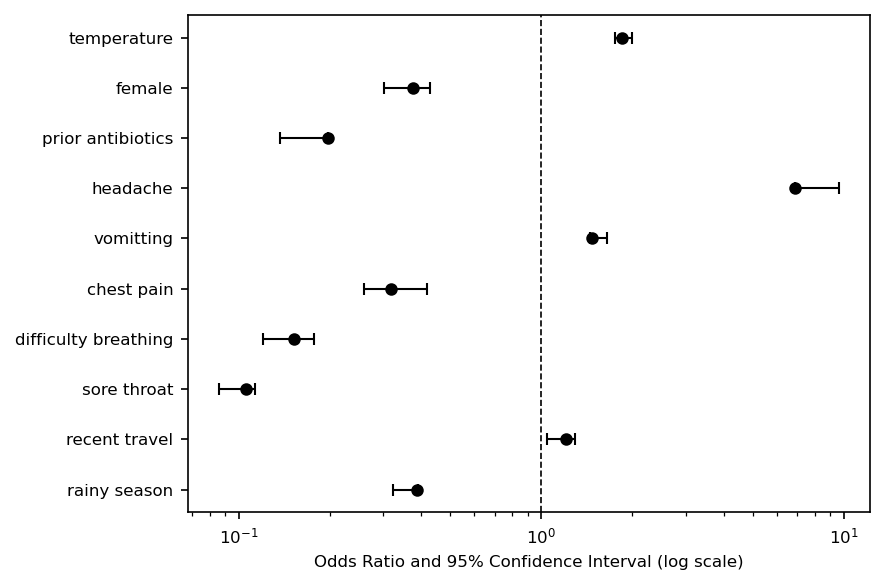

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=odds.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval (log scale)', fontsize=8)
plt.xscale("log")
plt.tight_layout()
plt.savefig('2018-clinical-no-malaria-or-plot.pdf')
plt.show()